## Importación de las bibliotecas necesarias

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import csv

## Importación de los datos

In [2]:
# Cargar datos
file_path = "data/groceries.csv"

## Transformar datos a lista de transacciones

In [3]:
transactions = []
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        transactions.append(row)

In [4]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: bool(169)
memory usage: 1.6 MB


In [6]:
# Algoritmo Apriori

frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487,0.495856
1,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597
2,(whole milk),(bottled beer),0.255516,0.080529,0.020437,0.079984,0.993237,-0.000139,0.999408,-0.009064
3,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,-0.000139,0.997684,-0.007351
4,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,0.003424,1.039945,0.155154
...,...,...,...,...,...,...,...,...,...,...
129,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633
130,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
131,(whole milk),"(yogurt, other vegetables)",0.255516,0.043416,0.022267,0.087147,2.007235,0.011174,1.047905,0.674027
132,(other vegetables),"(whole milk, yogurt)",0.193493,0.056024,0.022267,0.115081,2.054131,0.011427,1.066737,0.636294


In [7]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         134 non-null    object 
 1   consequents         134 non-null    object 
 2   antecedent support  134 non-null    float64
 3   consequent support  134 non-null    float64
 4   support             134 non-null    float64
 5   confidence          134 non-null    float64
 6   lift                134 non-null    float64
 7   leverage            134 non-null    float64
 8   conviction          134 non-null    float64
 9   zhangs_metric       134 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.6+ KB


In [8]:
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

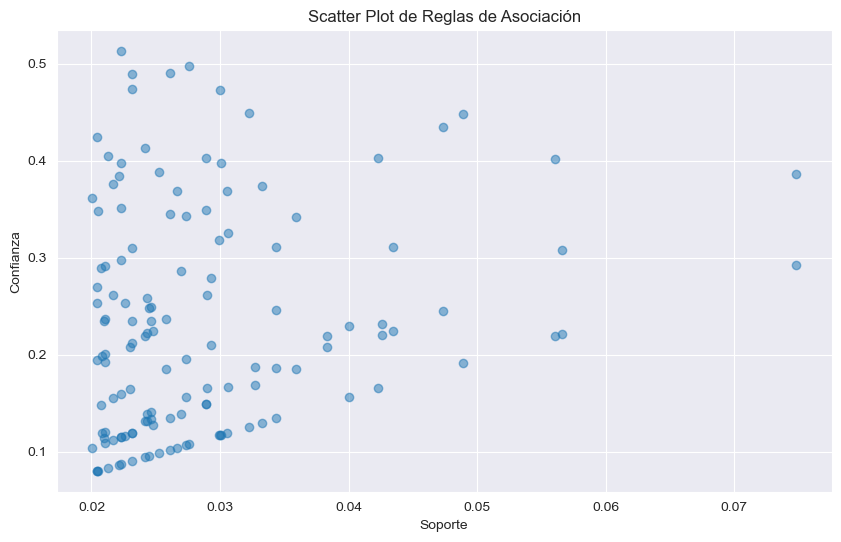

In [9]:
# Visualización de reglas de asociación
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Scatter Plot de Reglas de Asociación')
plt.grid(True)
plt.show()

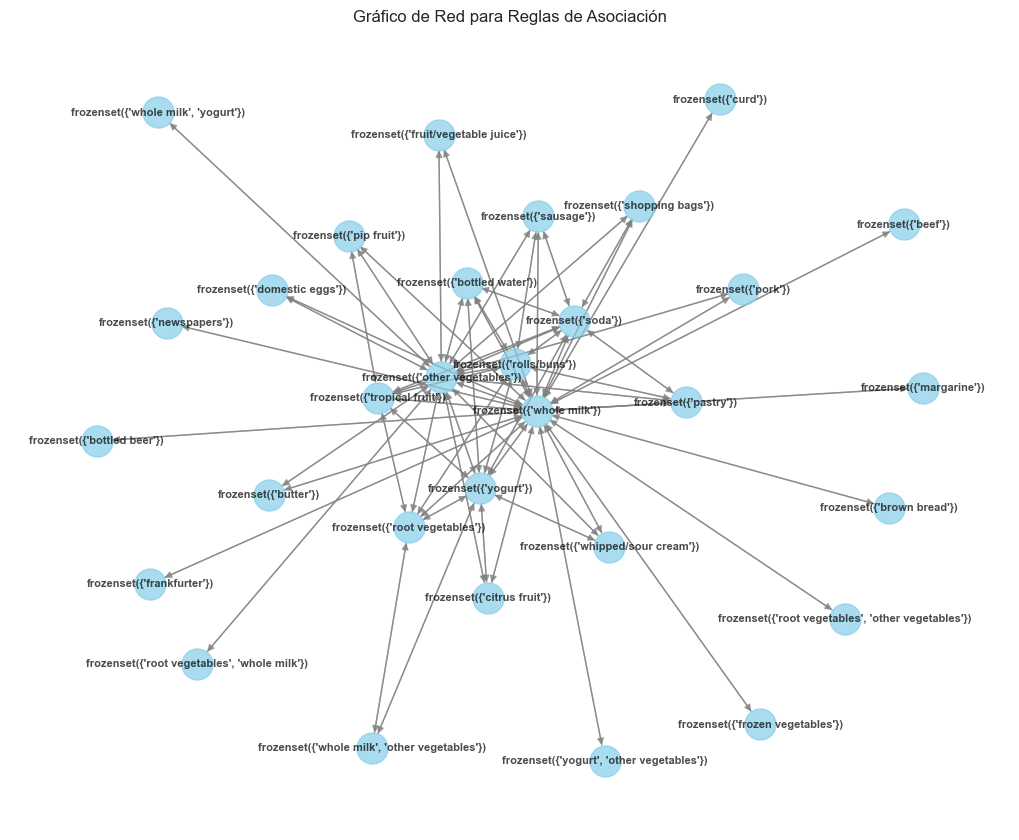

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un gráfico dirigido
G = nx.DiGraph()

# Agregar nodos y arcos al gráfico
for _, row in rules.iterrows():
    G.add_node(str(row['antecedents']))
    G.add_node(str(row['consequents']))
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['support'])

# Posicionamiento de nodos
pos = nx.spring_layout(G)

# Crear el gráfico de red
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black', node_color='skyblue', edge_color='gray', font_weight='bold', width=1, alpha=0.7)

# Etiquetas y título
plt.title('Gráfico de Red para Reglas de Asociación')
plt.show()

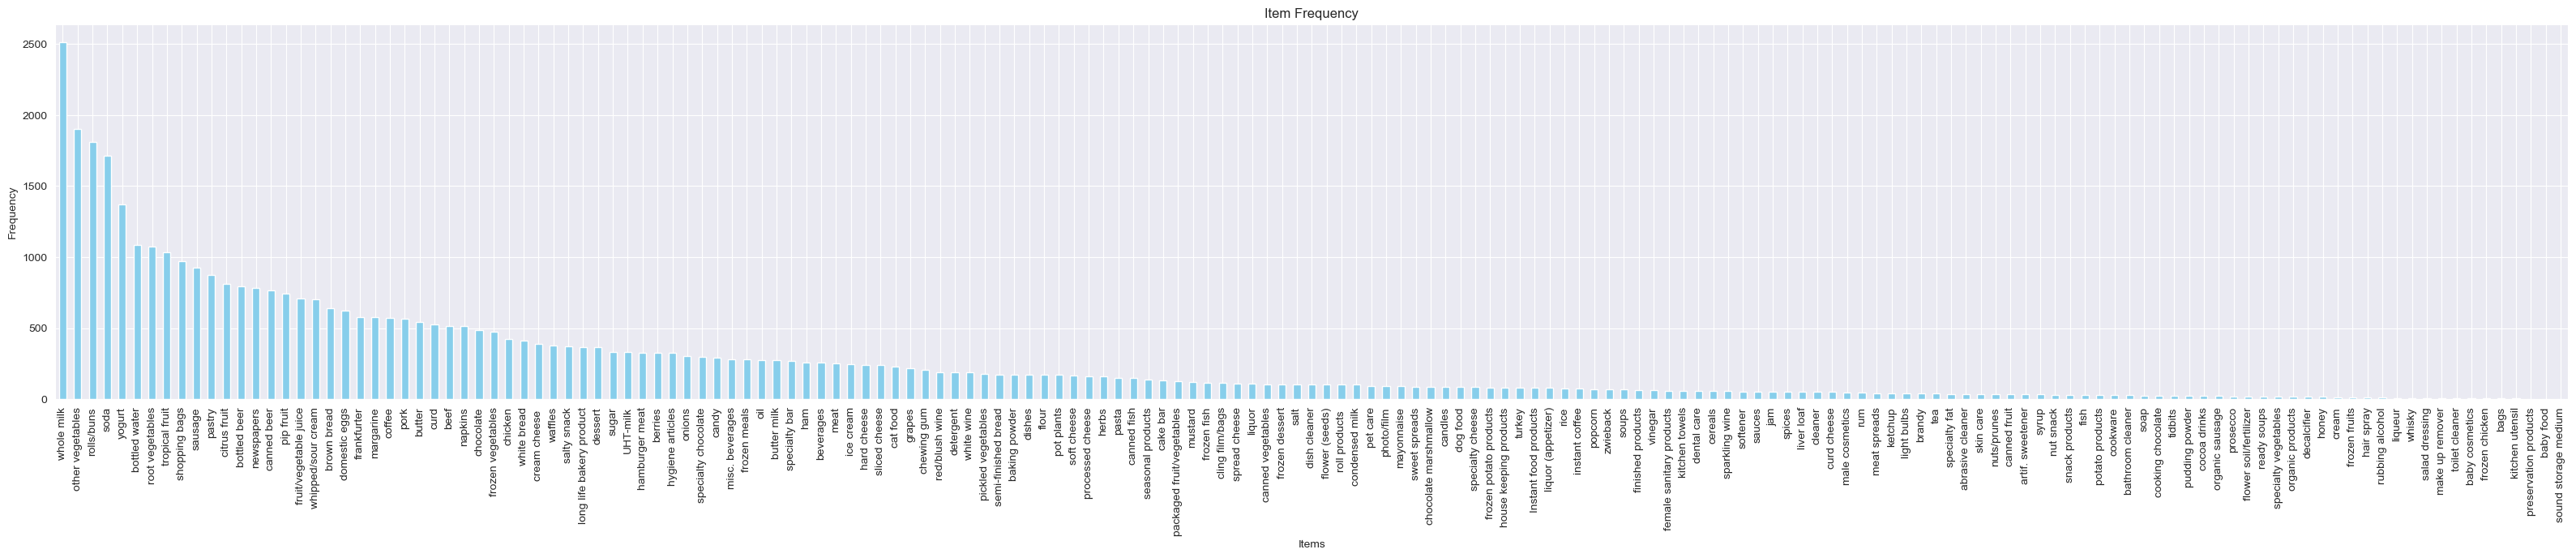

In [11]:
# Visualización de Item Frequency
# --------------------------------
item_freq = df.sum().sort_values(ascending=False)
item_freq.plot(kind='bar', figsize=(40, 6), color='skyblue')
plt.title('Item Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

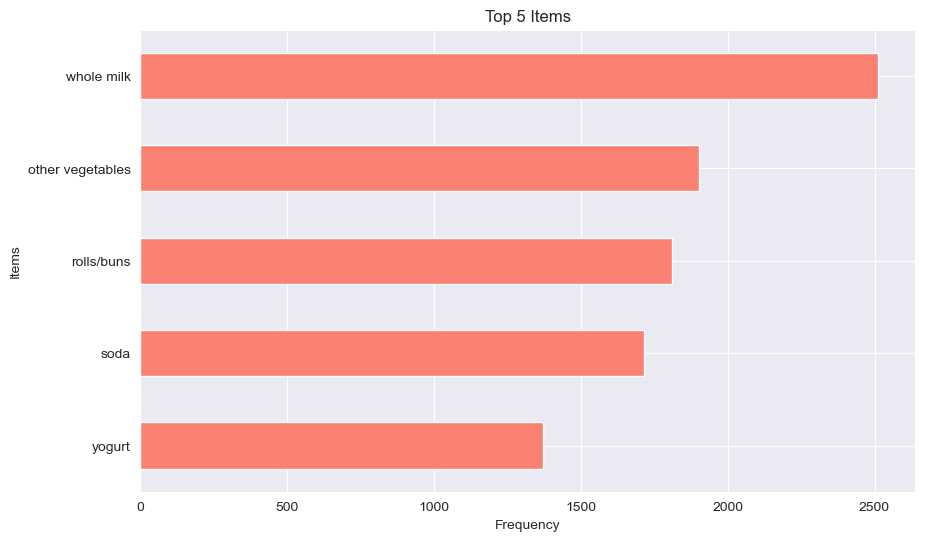

In [12]:
# Visualización de los N elementos más frecuentes
# ----------------------------------------------
top_n = 5
top_n_items = df.sum().nlargest(top_n).sort_values(ascending=True)
top_n_items.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title(f'Top {top_n} Items')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.show()

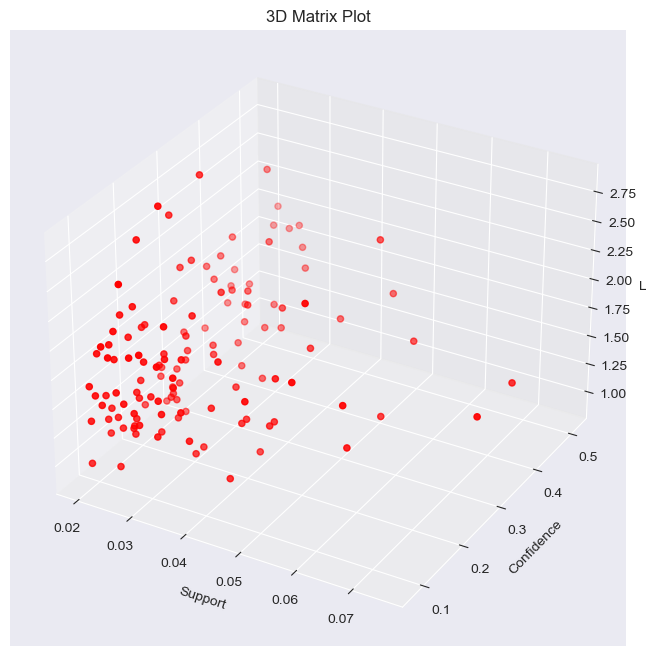

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# ...

# Grafico de matriz 3D
# ---------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraer datos de las reglas
x = rules['support']
y = rules['confidence']
z = rules['lift']

# Crear el gráfico 3D
ax.scatter(x, y, z, c='r', marker='o')

# Etiquetas y título
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('3D Matrix Plot')

plt.show()

In [17]:
import plotly.express as px

# Convertir conjuntos congelados a listas
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Grafico de matriz 3D interactivo con plotly
# -------------------------------------------
fig = px.scatter_3d(rules,
                    x='support',
                    y='confidence',
                    z='lift',
                    color='lift',
                    size_max=20,
                    opacity=0.7,
                    title='3D Matrix Plot',
                    labels={'support': 'Support', 'confidence': 'Confidence', 'lift': 'Lift'},
                    hover_data=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# Mostrar la figura interactiva
fig.show()

C:\Users\NEIRA\.conda\envs\unap\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\NEIRA\.conda\envs\unap\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [15]:
import seaborn as sns

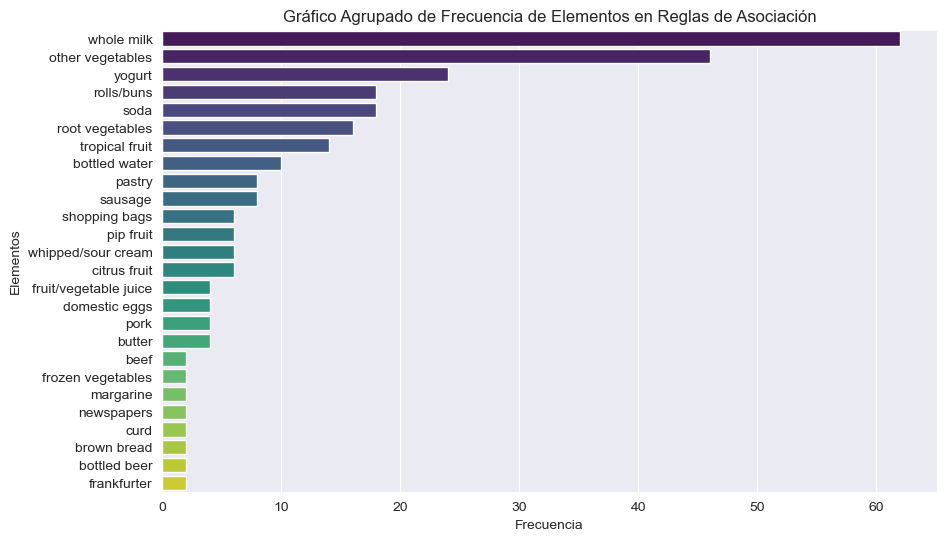

In [16]:
# Gráfico agrupado
# -----------------
# Asumiendo que 'antecedents' y 'consequents' son columnas en Lista_productos_Reglas
grouped_df = pd.concat([rules['antecedents'], rules['consequents']], ignore_index=True)
grouped_df = grouped_df.explode().value_counts().reset_index(name='frequency')

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='index', data=grouped_df, palette='viridis')
plt.title('Gráfico Agrupado de Frecuencia de Elementos en Reglas de Asociación')
plt.xlabel('Frecuencia')
plt.ylabel('Elementos')
plt.show()